In [139]:
import json
benchmark_path='financebench_result.json'

with open(benchmark_path, 'r') as f:
    data = json.load(f)

yes_list = []
yes_wa_list=[]
no_list=[]
na_list=[]
for i in range(0,150):
    if data[i]["response"]["correct"] == "yes":
        yes_list.append(i)
    elif data[i]["response"]["correct"] == "yes/wa":
        yes_wa_list.append(i)
    elif data[i]["response"]["correct"] == "no":
        no_list.append(i)
    elif data[i]["response"]["correct"] == "n/a":
        na_list.append(i)
    else:
        print(i)

total_questions = 150

print("Correct Answer + Aligned with Benchmark Answers: {:.2f}%".format(len(yes_list) / total_questions * 100))
print("Correct Answer + Benchmark Answers are Wrong: {:.2f}%".format(len(yes_wa_list) / total_questions * 100))
print("Valid Answer + Questions are Subjective / Invalid or Have Multiple Answers: {:.2f}%".format(len(na_list) / total_questions * 100))
print("Incorrect Answer / Not Found: {:.2f}%".format(len(no_list) / total_questions * 100))


Correct Answer + Aligned with Benchmark Answers: 82.67%
Correct Answer + Benchmark Answers are Wrong: 8.00%
Valid Answer + Questions are Subjective / Time-dependent or Have Multiple Answers: 3.33%
Incorrect Answer / Not Found: 6.00%


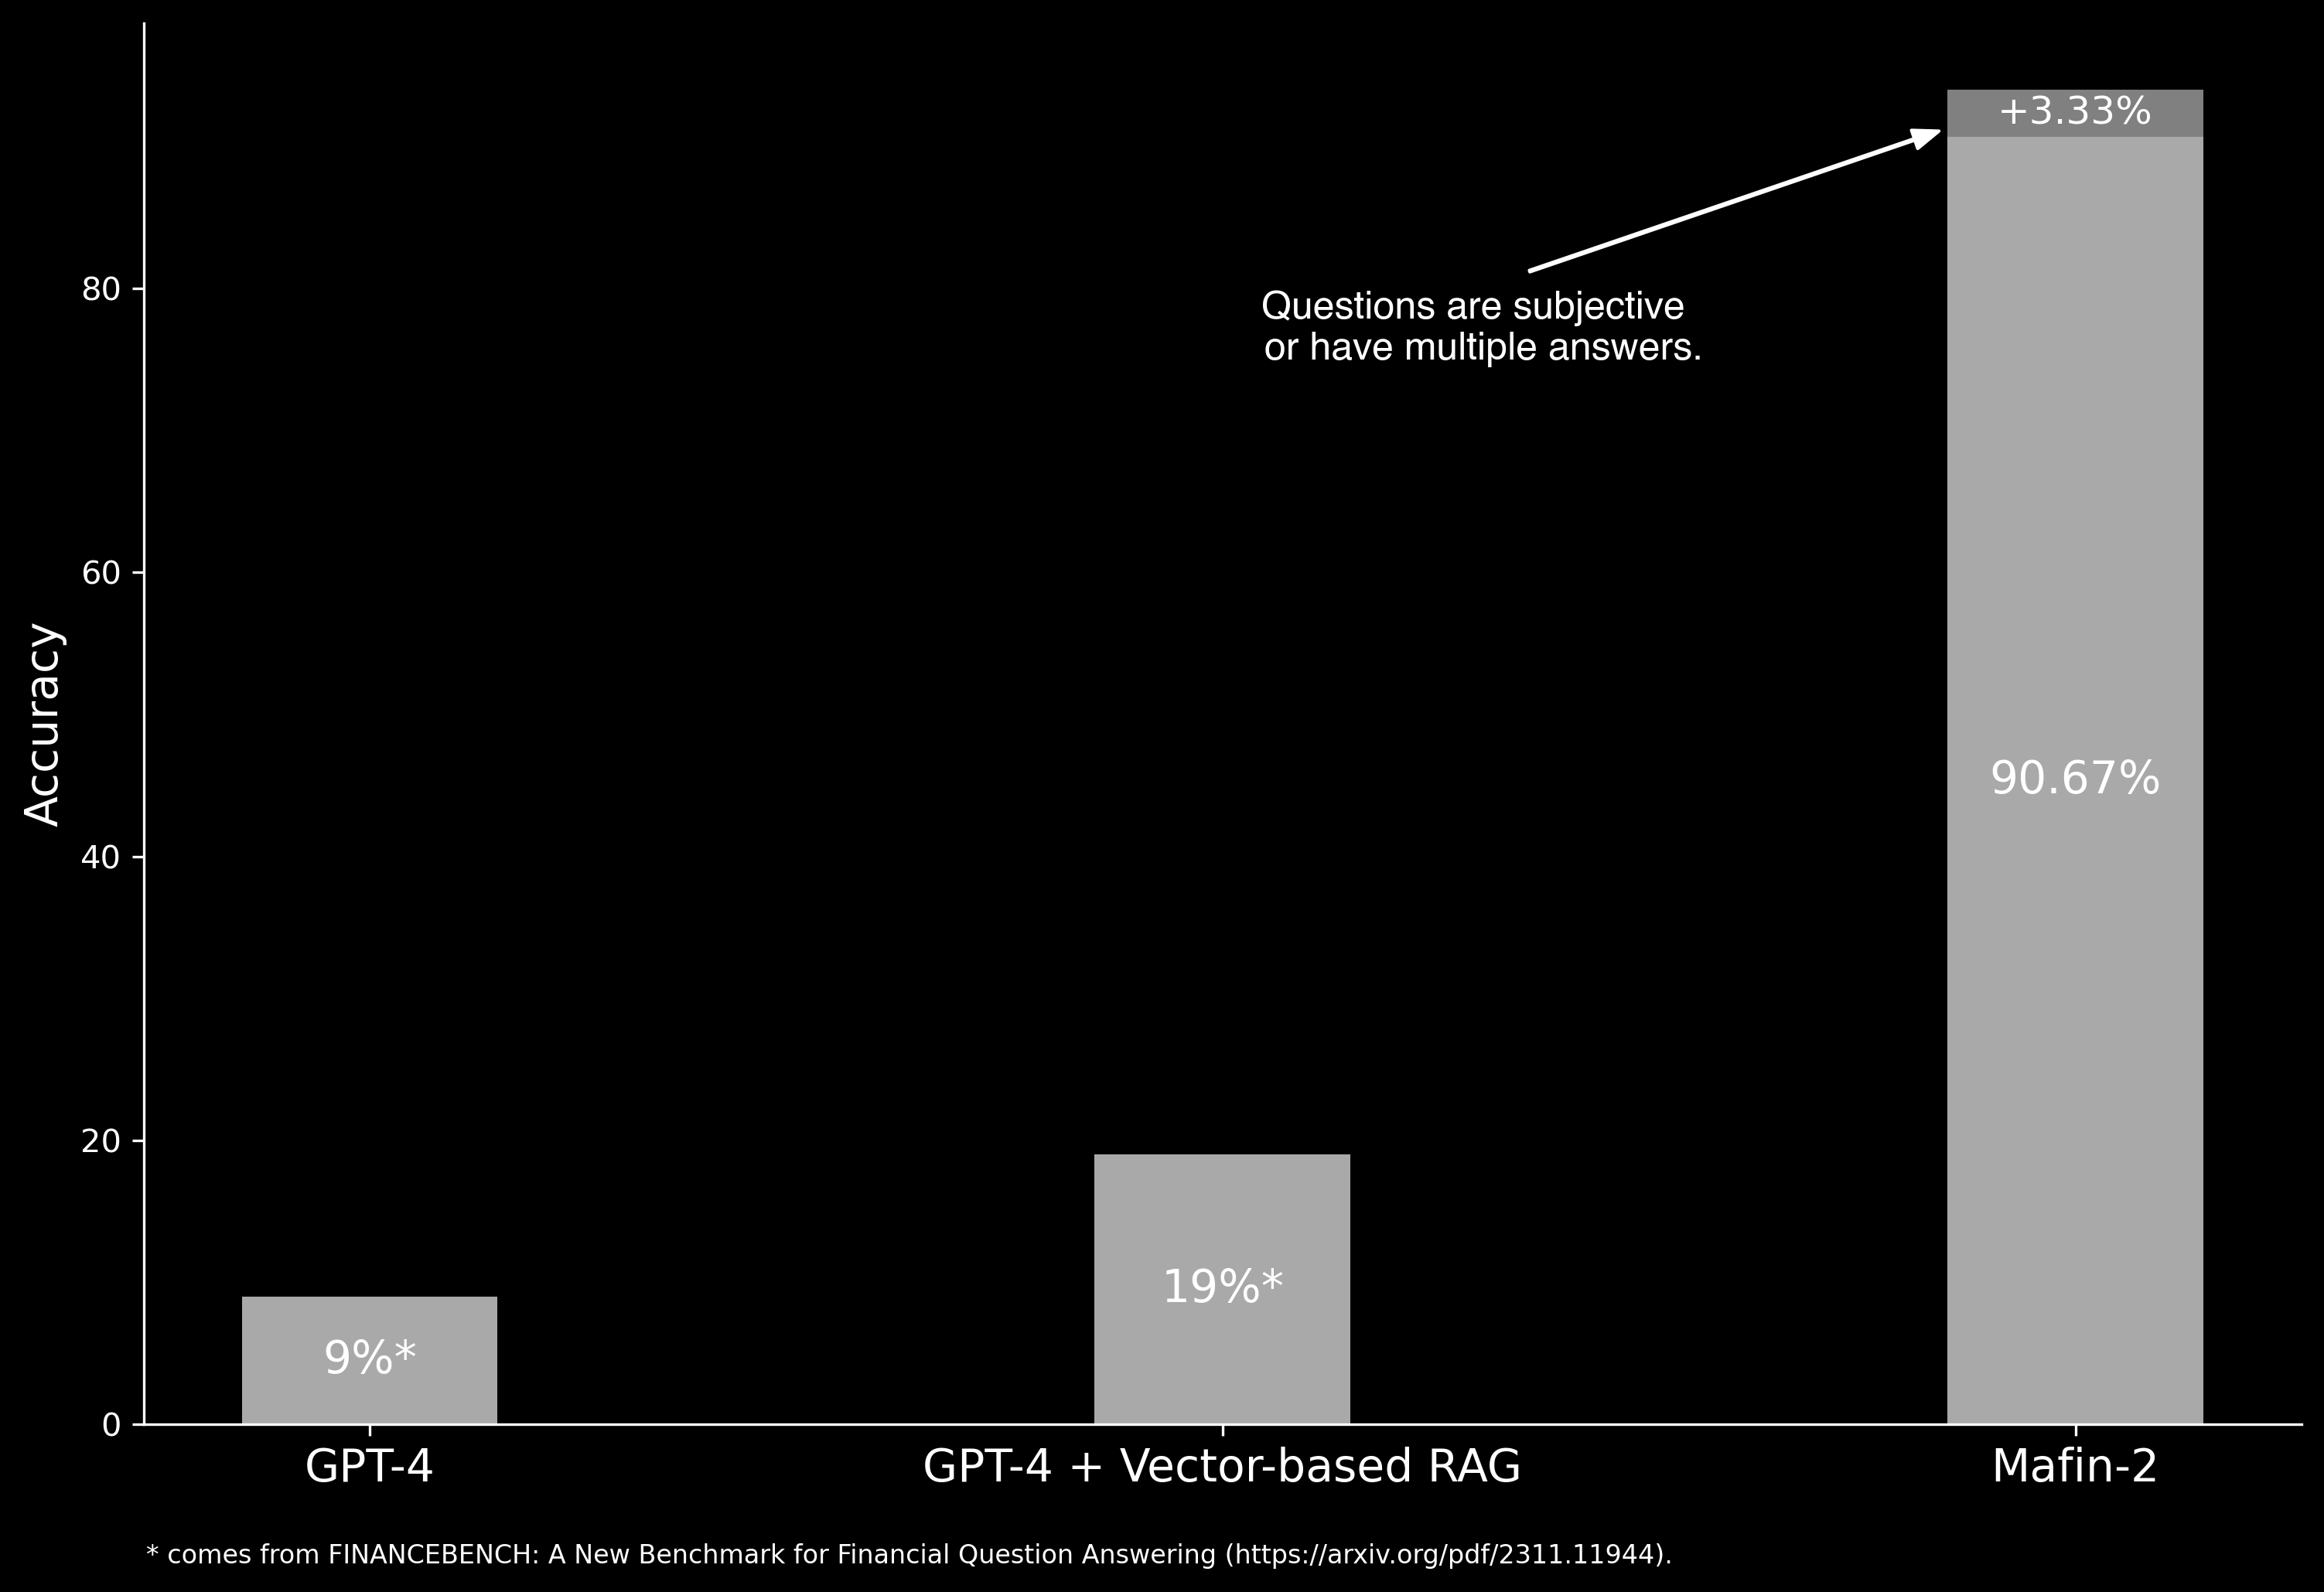

In [142]:
import matplotlib.pyplot as plt

# Data
labels = ['GPT-4', 'GPT-4 + Vector-based RAG', 'Mafin-2']
gpt4_values = [9, 19, 0]
vecfin_values_main = [0, 0, 90.67]
vecfin_values_additional = [0, 0, 3.33]

# Bar width
bar_width = 0.3

# Positions of the bars on the x-axis
r = [0, 1, 2]

# Creating the bar plot
plt.figure(figsize=(12, 8), dpi=300)
plt.style.use('dark_background')

plt.bar(r, gpt4_values, color='darkgrey', width=bar_width, label='GPT-4')
plt.bar(r, vecfin_values_main, color='darkgrey', width=bar_width, label='VecFin Main', bottom=gpt4_values)
plt.bar(r, vecfin_values_additional, color='grey', width=bar_width, label='VecFin Additional', bottom=[i+j for i, j in zip(gpt4_values, vecfin_values_main)])

# Adding labels
plt.ylabel('Accuracy', color='white', fontsize=14)
plt.xticks(r, labels, color='white', fontsize=14)
plt.yticks(color='white')
# plt.yticks([9, 29, 90.67, 94, 100], ['9%', '29%', '90.67%', '94%', '100%'], color='white')


# Removing upper and right border lines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding values on the bars
for i in range(len(r)):
    if gpt4_values[i] > 0:
        plt.text(r[i], gpt4_values[i]/2, str(gpt4_values[i])+"%*", color='white', ha='center', va='center', fontsize=14)
    if vecfin_values_main[i] > 0:
        plt.text(r[i], gpt4_values[i] + vecfin_values_main[i]/2, str(vecfin_values_main[i])+"%", color='white', ha='center', va='center', fontsize=14)
    if vecfin_values_additional[i] > 0:
        plt.text(r[i], gpt4_values[i] + vecfin_values_main[i] + vecfin_values_additional[i]/2, "+"+str(vecfin_values_additional[i])+"%", color='white', ha='center', va='center', fontsize=12)

# Adding annotation for the additional 3.33% in VecFin


plt.text(1.3, 75,
         'Questions are subjective \n or have multiple answers.', 
         color='white', ha='center', fontsize=12, fontname='Helvetica')


plt.annotate('',
             xy=(r[2]-0.1, gpt4_values[2] + vecfin_values_main[2] + vecfin_values_additional[2]/2), 
             xytext=(1.3, 80),
             arrowprops=dict(facecolor='white', shrink=0.1, width=0.5, headwidth=6, headlength=8))


plt.figtext(0.4, 0.05, '* comes from FINANCEBENCH: A New Benchmark for Financial Question Answering (https://arxiv.org/pdf/2311.11944).', ha='center', color='white', fontsize=8)

# Showing the plot
plt.show()